<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Estadística Computacional 1 </H1>

<H3> INF-280 Estadística Computacional </H3>
<H3> Autor: Francisco Andrades </H3>

Lenguaje: R

Temas:

    - LDA
    - Teorema de la Función Inversa
    - Teorema del Límite Central
    - Ley de los Grandes Números
<hr style="height:2px;border:none"/>

## 1. LDA (40p)

Es de mucho interés hoy en día el hecho de poder construir un clasificador que pueda inferir reglas a partir de los datos para poder predecir a futuro, en esta sección trabajará con una versión simplificada del dataset del titanic (data_titanic.csv), la que contiene 3 columnas:

* Age: la edad del pasajero
* Fare: el precio del boleto
* Survived: si sobrevivió a la tragedia o no

(Si, estamos en el ámbito multivariado ahora)

El clasificador, en breves palabras, intenta maximizar $P(Y=survived|X=age,fare)$ asumiendo que los datos ($X$) provienen de una distribución Gaussiana Multivariada. Se espera que usted sea capaz de obtener los máximos verosímiles de los parámetros de esta distribución para poder construir su clasificador **a mano**.

>a) Construya un clasificador LDA que permita distinguir si un pasajero sobrevive o no dado su edad y precio del ticket. *Recomendación: Puede separar una cantidad pequeña de datos para utilizarlos para probar su clasificador, es muy importante que si hace esto, estos datos no sean utilizados en la construcción del clasificador* 

Cualquier uso de las funciones provistas por los lenguajes que implementen LDA implica puntaje 0 en esta sección **sin excepción**.

Esta pregunta es un poco extensa por lo que se recomienda leer bien el material provisto (mas abajo) y los libros guías del curso. No es necesario que responda todo de una, puede ir por partes, es más, esto es recomendable porque así puede ir ganando puntaje y no jugarse todo en un "funciona/no funciona" recuerde explicar bien su razonamiento.

Si se complica mucho intente el caso univariado primero (fare vs survived ó age vs survived), si solamente presenta el univariado podrá optar a solamente 10 puntos del total (siempre y cuando esté bien).

Material que podría resultar útil:
* [Video](https://www.youtube.com/watch?v=azXCzI57Yfc)
* [Articulo LDA](https://towardsdatascience.com/classification-part-2-linear-discriminant-analysis-ea60c45b9ee5)
* [Explicacion matematica de sklearn](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)
* Libros Guía indicados en el Syllabus(verosimilitud)


In [72]:
tabla <- read.csv("titanic.csv")
tabla <- tabla[ , c(2, 6, 10)]

#--- se cambia segundo parámetro para aumentar cantidad de datos.
tablaprueba <- head(tabla, 850)

#se separa la tabla en las dos clases, vivos y otros.
tablavivos <- tablaprueba[tablaprueba[,"Survived"] == 1,]
tablaotros <- tablaprueba[tablaprueba[,"Survived"] == 0,]

#se calcula la probabilidad de cada clase
pi_vivos <- nrow(tablavivos)/nrow(tablaprueba)
pi_otros <- nrow(tablaotros)/nrow(tablaprueba)

#sólo consideramos datos sin NA para el cálculo de la covarianza
tabla1 <- tablaprueba[!is.na(tablaprueba$Age),]


#calcula promedio de Age para cada tabla
promtablavivos <- sum(subset(tablavivos, Age != "NA")$Age)/nrow(subset(tablavivos, Age != "NA"))
promtablaotros <- sum(subset(tablaotros, Age != "NA")$Age)/nrow(subset(tablavivos, Age != "NA"))
#calcula promedio de Fare para cada tabla
promfarevivos <- sum(subset(tablavivos,)$Fare)/nrow(subset(tablavivos,))
promfareotros <- sum(subset(tablaotros,)$Fare)/nrow(subset(tablaotros,))

# se reemplaza los NA en Age por el promedio correspondiente.
tablavivos[is.na(tablavivos)] <- promtablavivos
tablaotros[is.na(tablaotros)] <- promtablaotros

#se asume una covarianza igual para las dos clases, se calcula a partir de la tabla general
cov_tabla <- var(tabla1[,c(2, 3)])
#inversa de la covarianza
matriz <- solve(cov_tabla)

# vectores promedio
vector_vivos <- c(promtablavivos,promfarevivos)
vector_otros <- c(promtablaotros,promfareotros)
#vector a ingresar
#MODIFICAR
x <- c(15,7.2250)

#calculo de la función discriminante para cada clase. Numero mayor -> clase más probable
numero_vivo <- t(x)%*%matriz%*%vector_vivos - 1/2* (t(vector_vivos)%*%matriz%*%vector_vivos) + log(pi_vivos)
numero2_otro <-t(x)%*%matriz%*%vector_otros - 1/2* (t(vector_otros)%*%matriz%*%vector_otros) + log(pi_otros)

numero_vivo
numero2_otro


-1.079248


-2.117984


# 2. Teorema de la Función Inversa (10p)

El teorema de la función inversa permite generar variables aleatorias continuas con una función de distribución $F(x)$ a partir de la inversa $F^{-1}(x)$. Donde los valores generados en la función inversa están regidos por una distribución uniforme $u \sim U(0,1)$. 

En esta sección se trabajará con la distribución Weibull, cuya función de densidad de probabilidad está dada por:

\begin{aligned}
Weibull(\alpha,\beta) = \frac{\alpha}{\beta^{\alpha}}x^{\alpha -1}\cdot exp \left( \frac{-x}{\beta}\right)^{\alpha}
\end{aligned}

Para trabajar el teorema de la función inversa siga los siguientes pasos:

1. Identificar la función que defina a la variable aleatoria.
2. De dicha función calcular la función de densidad acumulada. Explique en breves palabras como obtenerla y si es invertible o no (Lo de invertible hace referencia a esta función de densidad acumulada Weibull en particular y no olvide mencionar cual es la función de densidad acumulada Weibull).
3. De la función de densidad acumulada despejar la variable X. La distribución Weibull a trabajar tiene parámetros $\alpha = 10$ y $\beta = 3$
4. Generar 10000 valores que siguen la distribución $u \sim U(0,1)$ y utilícelos como argumento en la función inversa encontrada
5. Genere una distribución weibull de tamaño 10000 con los mismos $\alpha$ y $\beta$ que la trabajada. Y haga un gráfico de la densidad de dichos valores. 
6. Concluya respecto a lo que observa en ambas gráficas.

#### 1)
La función de densidad nos definirá la variable aleatoria. Tomando en consideración que es una distribución de Weibull, la función queda: 


$$ f(x) = \frac{\alpha}{\beta^{\alpha}}x^{\alpha -1} e^{-\left(\frac x \beta \right)^{\alpha}} \text{ con } x >= 0 $$
con $\alpha$ y $\beta$ son constantes.

#### 2)
Integrando entre x = 0 y x = s (s >= 0), la función anterior, obtendremos la función de densidad acumulada:

$$ F(x) = \int^{s}_{0} f(x) dx $$
$$ F(x) = \int^{s}_{0} \frac{\alpha}{\beta^{\alpha}}x^{\alpha -1} e^{-\left(\frac x \beta \right)^{\alpha}} dx $$
$$ F(x) = 1 - e^{ \left( - \left(\frac s  \beta \right)^{\alpha} \right) }$$

#### 3)
Tomando los valores ${\alpha}$ = 10 y ${\beta}$ = 3, reemplazamos en  $F(x)$, quedando: 

$$F(x) = 1 - e^{ \left( - \left(\frac x 3 \right)^{10} \right) }$$

Para simplificar, se considerará $y = F(x)$. Luego, se continúa despejando $ x $:

$$ e^{ \left( - \left(\frac x  3 \right)^{10} \right) } = 1 - y $$
$$  - (\frac x 3 )^{10} = ln(1 - y) $$
$$ (\frac x 3)^{10} = -{ln(1-y)} $$
$$ \frac x 3 = \sqrt[10]{-ln(1-y)} $$

$$ x = 3\sqrt[10]{-ln(1-y)} $$

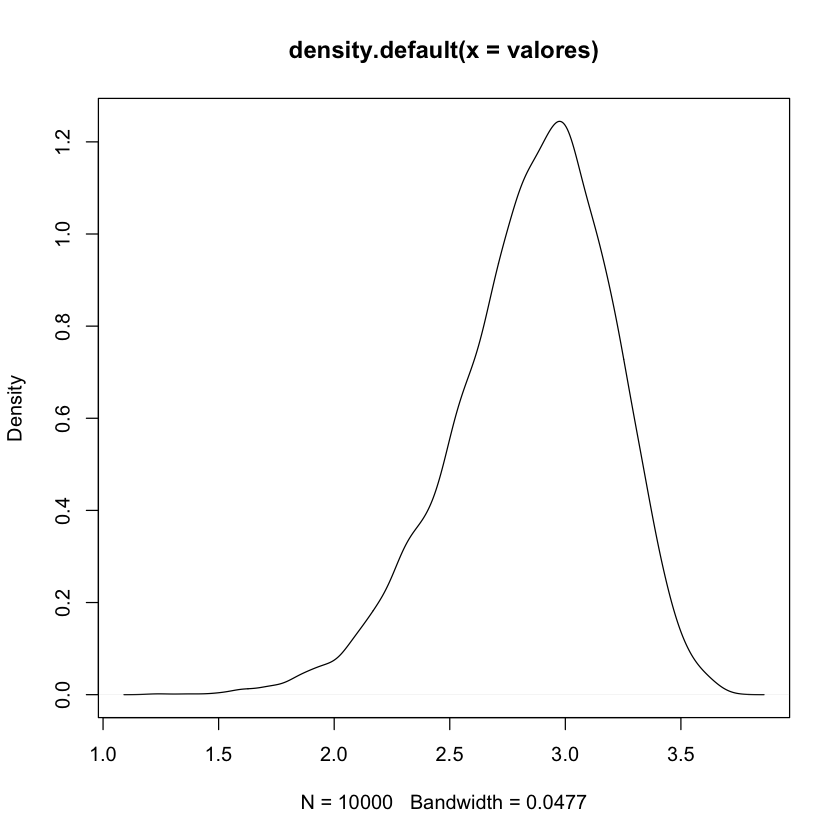

In [1]:
###4
dom = runif(10000, min = 0, max = 1) #vector con 10000 numeros entre 0 y 1 será el dominio
valores = c()

i = 0
while(i < 10000){
    valor = 3 * (-log(1-dom[i+1]))^0.1 
    valores = append(x = valores, values = valor)
    i = i + 1
}

plot(density(valores))

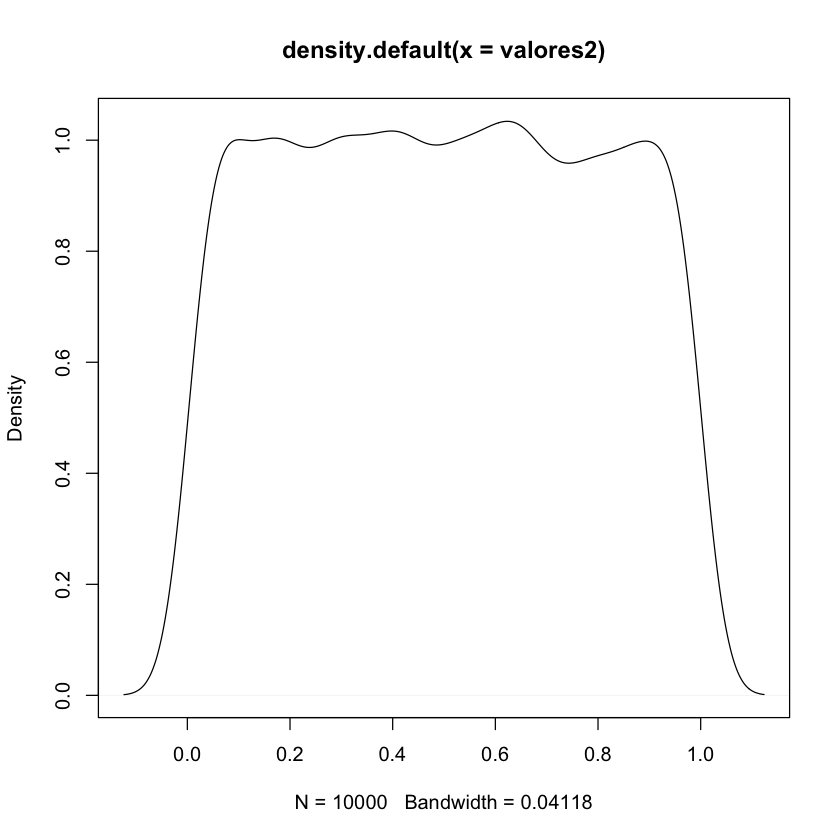

In [2]:
###5
j = 0
valores2 = c()
while(j < 10000){
    valor2 = 1 - exp(-(valores[j+1]/3)^10)
    valores2 = append(x = valores2, values = valor2)
    j = j + 1
}

plot(density(valores2))

#### 6) 
En el gráfico de $#4$ es posible observar el comportamiento de la inversa de la distribución Weibull. Es fácil notar que se mueve aproximadamente entre los valores $1.5$ y $3.75$. Asimismo, la densidad crece aceleradamente(exponencial) a partir de $1.2$, llegando al máximo punto para el valor de $3$. 

En el gráfico de $#5$ se denota la uniformidad de la densidad entre los valores $0$ y $1$. Lo anterior hace sentido, puesto que previamente se utilizó un dominio generado aleatoriamente entre estos valores.

## 3. Teorema del Límite Central (30p)

El teorema del límite central es uno de los postulados más importantes de estadística. En esta sección se procederá a comprobarlo en su forma clásica. 

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

En esta sección se trabajará con la siguiente distribución y se demostrará lo que enuncia el TLC.

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.2     |
|   9   |     0.10     |
|   10  |     0.05     |
|   11  |     0.2      |
|   12  |     0.05     |

>a) Determine el valor esperado y la varianza **TEÓRICOS**

In [132]:
valor_esperado <- 1*0.1 + 2*0.2 + 5*0.05 + 6*0.05 + 7*0.2 + 9*0.10 + 10*0.05 + 11*0.2 + 12*0.05
valor_esperado

varianza <- 1*0.1 + 4*0.2 + 25*0.05 + 36*0.05 + 49*0.2 + 81*0.10 + 100*0.05 + 121*0.2 + 144*0.05 - (valor_esperado^2)
varianza

[1] 6.65

[1] 14.0275

>b) Con $P = 10,1000$ calcule la media de muestras de tamaño : $n \in[2,10,30,100,1000]$ compare los resultados obtenidos para los dos $P$ dados. Presente los datos en una tabla ordenada con columnas: $n,\;P=10,\;P=1000$ Comente, ¿qué parece influir mas, la cantidad de repeticiones, el tamaño de la muestra o ambas?

In [70]:
P <- 10


#se producen las muestras
#numero = promedio de cada muestra
P10_1 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 2, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/2})

P10_2 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 10, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/10})

P10_3 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 30, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/30})

P10_4 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 100, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/100})

P10_5 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 1000, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/1000})


P <- 1000

P1000_1 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 2, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/2})


P1000_2 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 10, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/10})

P1000_3 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 30, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/30})

P1000_4 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 100, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/100})

P1000_5 <- replicate(n = P,{
numero <- sum(dadoCargado = sample(c(1,2,5,6,7,9,10,11,12), 1000, replace = TRUE, prob = c(0.1,0.2,0.05,0.05,0.2,0.10,0.05,0.2,0.05)))/1000})


#se crea la tabla
n = c(2,10,30,100,1000)
P10_Media = c(sum(P10_1)/10,sum(P10_2)/10,sum(P10_3)/10,sum(P10_4)/10,sum(P10_5)/10)
P1000_Media = c(sum(P1000_1)/1000,sum(P1000_2)/1000,sum(P1000_3)/1000,sum(P1000_4)/1000,sum(P1000_5)/1000)

P10_Var = c(var(P10_1),var(P10_2),var(P10_3),var(P10_4),var(P10_5))
P1000_Var = c(var(P1000_1),var(P1000_2),var(P1000_3),var(P1000_4),var(P1000_5))

VAR10_Por_N <- P10_Var * n
VAR1000_Por_N <- P1000_Var * n
tabla3 <- data.frame(n,P10_Media,P1000_Media,P10_Var,P1000_Var,VAR10_Por_N,VAR1000_Por_N)
tabla3





n,P10_Media,P1000_Media,P10_Var,P1000_Var,VAR10_Por_N,VAR1000_Por_N
2,6.100000,6.652500,11.211111111,7.06155531,22.422222,14.12311
10,7.220000,6.648400,1.275111111,1.30698442,12.751111,13.06984
30,6.676667,6.652333,0.232358025,0.46245479,6.970741,13.87364
100,6.721000,6.641620,0.160632222,0.14356094,16.063222,14.35609
1000,6.644700,6.658410,0.005812011,0.01372552,5.812011,13.72552


**Pareciése influir más la cantidad de repeticiones**

Se puede observar en la tabla que tanto la precisión de la varianza como la de la media mejora considerablemente para P = 1000, aún con tamaños de muestras bajos.

>c) Con lo obtenido en b) haga un histograma para las muestras de tamaño 2, 30 y 1000 de P = 1000. Comente lo que observa y concluya. ¿Se cumple lo que enuncia el teorema del límite central?

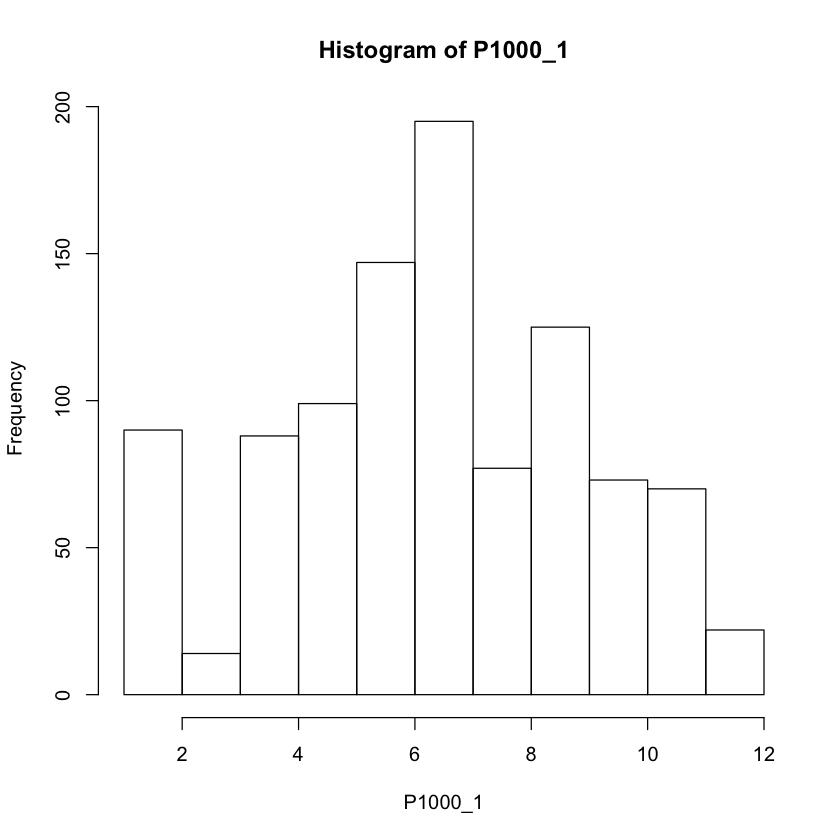

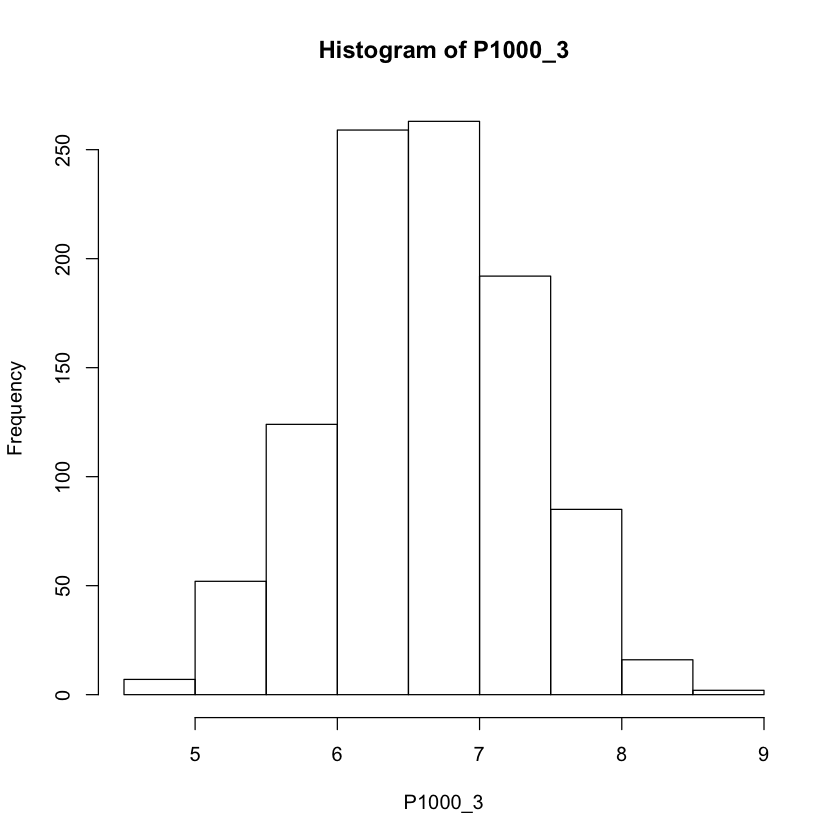

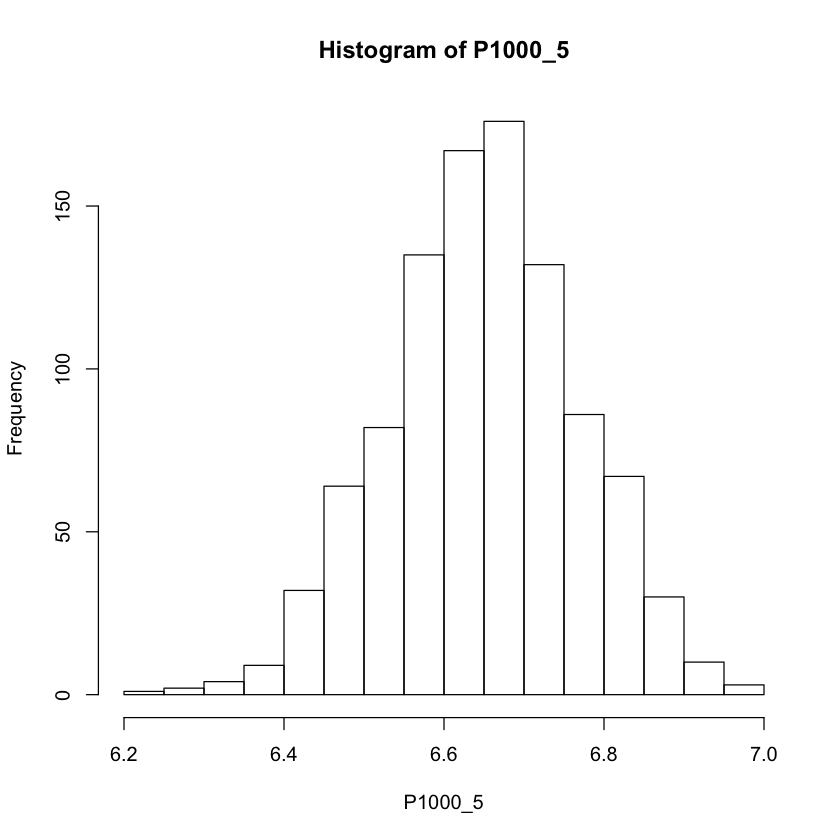

In [61]:
#se crea el histograma
hist(P1000_1)
hist(P1000_3)
hist(P1000_5)

**Se cumple** 

Se observa una distribución normal, con media y varianza coherentes a lo enunciado por el TLC.

## 4. Ley de los Grandes Números (20p)

En estadística, la ley de los grandes números engloba teoremas que describen el comportamiento del promedio de una distribución de variables aleatorias. La ley de los grandes números dice que, en pocas palabras, a medida que se aumenta el tamaño muestral el promedio de la distribución de variables aleatorias converge al promedio de la población completa.

Un estudio realizado en el casino de la universidad MSU, indica que el tiempo de espera en la cola del casino para obtener su almuerzo puede modelarse como una distribución Exponencial con parámetro: $\lambda = 0.1$

>a) **Utilizando las funciones provistas por los lenguajes** calcule la probabilida **teórica** de que un alumno espere menos de 10 minutos, exactamente 20 minutos y más de 50 minutos.

In [27]:
#se calcula probabilidad teórica
pexp(10.0, rate=0.1, lower.tail = T)

1 - pexp(20.0, rate=0.1,lower.tail = T) - pexp(20.0, rate=0.1,lower.tail = F)

pexp(50.0, rate=0.1, lower.tail = F)

[1] 0.6321206

[1] 0

[1] 0.006737947

>b) Ahora genere 3 muestras de dicha distribución exponencial, con tamaños n = 5, 100, 300, 10000. Para cada una de estas muestras determine las mismas probabilidades calculadas en a) de manera empírica, comente sus resultados.

In [68]:
#se crean las muestras
muestra1 <- rexp(5, rate = 0.1)
muestra2 <- rexp(100, rate = 0.1)
muestra3 <- rexp(300, rate = 0.1)
muestra4 <- rexp(10000, rate = 0.1)


sum(muestra1 < 10)/5
sum(muestra2 < 10)/100
sum(muestra3 < 10)/300
sum(muestra4 < 10)/10000

sum(muestra1 > 50)/5
sum(muestra2 > 50)/100
sum(muestra3 > 50)/300
sum(muestra4 > 50)/10000

sum(muestra1 == 20.0)/5
sum(muestra2 == 20.0)/100
sum(muestra3 == 20.0)/300
sum(muestra4 == 20.0)/10000



[1] 0.8

[1] 0.59

[1] 0.64

[1] 0.6356

[1] 0

[1] 0.01

[1] 0.01

[1] 0.0061

[1] 0

[1] 0

[1] 0

[1] 0

**Los resultados son coherentes con los valores teóricos**

Una observación obvia es el aumento de precisión utilizando muestras más grandes. Cortesía de La Ley de Los Grandes Numeros.

>c) ¿Cuál debería ser la media **teórica** de todas estas distribuciones? ¿Y cuál es la empírica? ¿Si difieren o son iguales a qué se debe esto?

In [77]:
#se calcula media empírica
sum(muestra1)/5
sum(muestra2)/100
sum(muestra3)/300
sum(muestra4)/10000

[1] 7.263741

[1] 11.00077

[1] 9.635578

[1] 9.984549

La media Teórica debiése ser 1/0.1 = 10
Empíricamente, la media rodea este número (es coherente).
El que sean iguales, especialmente a muestras más grandes, se debe precisamente a La Ley De Los Grandes Números.

>d) Genere **un** gráfico de 4 boxplot (1 de cada distribución) y compárelos. Comente lo que observa y concluya respecto a la ley de los grandes números.

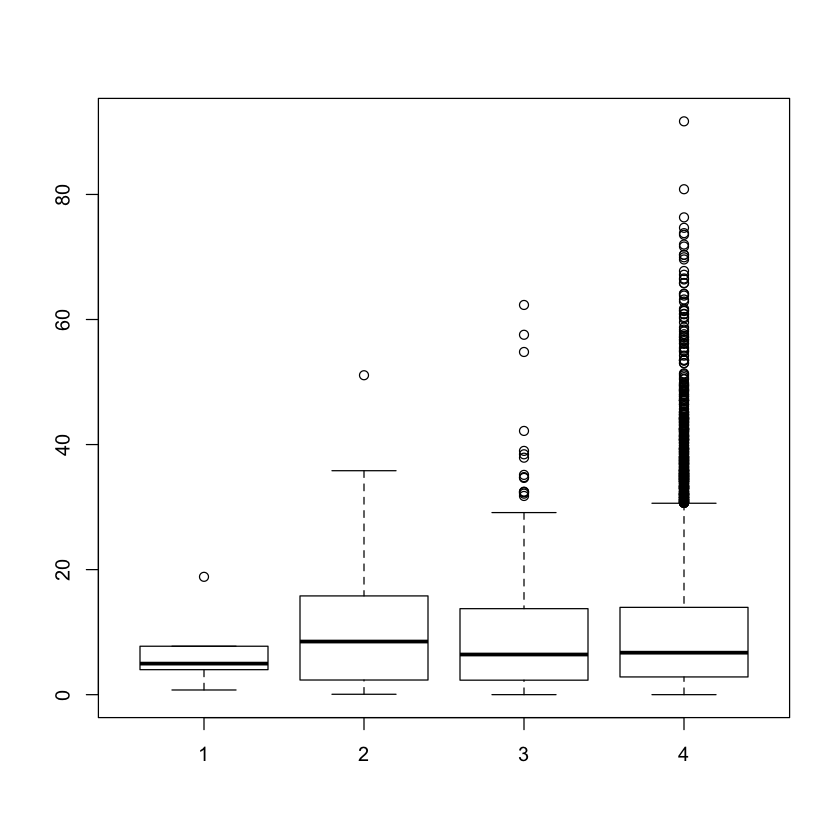

In [76]:
boxplot(muestra1,muestra2,muestra3,muestra4)

**Se observa una distribución exponencial**
La mayor cantidad de datos se encuentra entre 0 y 20, decreciendo exponencialmente a medida que aumenta el tiempo.
Se logra observar con mayor claridad en la muestra 4 (n = 10000). Debido a la Ley de lo Grandes Números, esta muestra es más fiel a la distribución exponencial que trata de emular.